# Battle of Neighborhoods

# New York City Hotel Analysis for Investors

### To check out
### Introduction - Background , Business Problem and Target audience
<a href = "https://github.com/Rishikesh217/sample-repository/blob/master/Capstone_week4_1.ipynb"> This link</a>

### To check out
### Analysis , Data Requirements 
<a href = "https://github.com/Rishikesh217/sample-repository/blob/master/Capstone4_2.ipynb"> This link</a>

# Data preprocessing

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")


Libraries imported.


In [2]:
df2 = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Selecting appropriate fields

In [4]:

column_names = ['id','name','neighbourhood_group','neighbourhood','latitude','longitude','price']
df_hotel= df2[['id','name','neighbourhood_group','neighbourhood','latitude','longitude','price']]

In [5]:
df_hotel.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,price
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,149
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,150
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,80


# Reading data from all 5 excel files

In [32]:
df_bronx = pd.read_excel('rollingsales_bronx.xls')

In [33]:
df_bronx = df_bronx.drop([0,1,2]).reset_index(drop = True)

In [36]:
df_bronx.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object', name=0)

In [24]:
#df_bronx = df_bronx.drop(df_bronx.index[0])

In [35]:
#Setting appropriate columns
df_bronx.columns = df_bronx.iloc[0]

In [37]:
df_bronx = df_bronx.drop(df_bronx.index[0])

In [38]:
df_bronx.head()



,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,NaN,A1,4455 PARK AVENUE,NaN,10457,1,0,1,1622,1587,1899,1,A1,458000,2020-01-31 00:00:00
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,67,NaN,A1,4451 PARK AVENUE,NaN,10457,1,0,1,1646,1495,1899,1,A1,275000,2020-03-16 00:00:00
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,70,NaN,A1,4445 PARK AVENUE,NaN,10457,1,0,1,1694,1497,1899,1,A1,388500,2019-07-23 00:00:00
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,29,NaN,A9,2327 WASHINGTON AVENUE,NaN,10458,1,0,1,1095,1260,1910,1,A9,110000,2019-12-06 00:00:00
5,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,29,NaN,A9,2327 WASHINGTON AVE,NaN,10458,1,0,1,1095,1260,1910,1,A9,165000,2020-03-02 00:00:00


In [39]:
df_bronx_set = df_bronx[~(df_bronx == 0).any(axis=1)]

In [40]:
df_bronx_set = df_bronx_set.dropna(subset = ['GROSS SQUARE FEET'] , axis = 0)

In [41]:
df_bronx_set['SALEPRICE/FEET'] =df_bronx_set['SALE PRICE']/df_bronx_set['GROSS SQUARE FEET']



In [42]:
df_bronx_set.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALEPRICE/FEET
48,2,BATHGATE,07 RENTALS - WALKUP APARTMENTS,2,2927,14,NaN,C7,3782 3 AVENUE,NaN,10456,12,2,14,2500,9419,1931,2,C7,1800000,2020-01-29 00:00:00,191.103
55,2,BATHGATE,14 RENTALS - 4-10 UNIT,2A,2912,25,NaN,S4,3827 3RD AVENUE,NaN,10457,4,1,5,2000,5940,2011,2,S4,1420000,2019-04-12 00:00:00,239.057
230,2,BAYCHESTER,01 ONE FAMILY DWELLINGS,1,4982,97,NaN,S1,4000 BAYCHESTER AVENUE,NaN,10466,1,1,2,1513,2229,1965,1,S1,365000,2019-09-05 00:00:00,163.751
316,2,BAYCHESTER,02 TWO FAMILY DWELLINGS,1,4762,162,NaN,S2,3054 FENTON AVENUE,NaN,10469,2,1,3,2060,2400,1920,1,S2,387000,2020-02-07 00:00:00,161.25
662,2,BEDFORD PARK/NORWOOD,02 TWO FAMILY DWELLINGS,1,3309,53,NaN,S2,248 EAST 204 STREET,NaN,10458,2,1,3,752,2275,1931,1,S2,700000,2019-11-07 00:00:00,307.692


In [43]:
df_bronx_set['SALEPRICE/FEET'] = df_bronx_set['SALEPRICE/FEET'].astype('float64')

In [44]:
 df_bronx_set.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALEPRICE/FEET
48,2,BATHGATE,07 RENTALS - WALKUP APARTMENTS,2,2927,14,NaN,C7,3782 3 AVENUE,NaN,10456,12,2,14,2500,9419,1931,2,C7,1800000,2020-01-29 00:00:00,191.103089
55,2,BATHGATE,14 RENTALS - 4-10 UNIT,2A,2912,25,NaN,S4,3827 3RD AVENUE,NaN,10457,4,1,5,2000,5940,2011,2,S4,1420000,2019-04-12 00:00:00,239.057239
230,2,BAYCHESTER,01 ONE FAMILY DWELLINGS,1,4982,97,NaN,S1,4000 BAYCHESTER AVENUE,NaN,10466,1,1,2,1513,2229,1965,1,S1,365000,2019-09-05 00:00:00,163.750561
316,2,BAYCHESTER,02 TWO FAMILY DWELLINGS,1,4762,162,NaN,S2,3054 FENTON AVENUE,NaN,10469,2,1,3,2060,2400,1920,1,S2,387000,2020-02-07 00:00:00,161.250000
662,2,BEDFORD PARK/NORWOOD,02 TWO FAMILY DWELLINGS,1,3309,53,NaN,S2,248 EAST 204 STREET,NaN,10458,2,1,3,752,2275,1931,1,S2,700000,2019-11-07 00:00:00,307.692308


In [45]:
df_bronx_set1 = df_bronx_set.groupby(['NEIGHBORHOOD','SALEPRICE/FEET'])

In [46]:
df_bronx_set1['NEIGHBORHOOD'].unique()

NEIGHBORHOOD               SALEPRICE/FEET
BATHGATE                   191.103089                         [BATHGATE]
                           239.057239                         [BATHGATE]
BAYCHESTER                 161.250000                       [BAYCHESTER]
                           163.750561                       [BAYCHESTER]
BEDFORD PARK/NORWOOD       170.294118             [BEDFORD PARK/NORWOOD]
                           172.014925             [BEDFORD PARK/NORWOOD]
                           198.521647             [BEDFORD PARK/NORWOOD]
                           281.265845             [BEDFORD PARK/NORWOOD]
                           307.692308             [BEDFORD PARK/NORWOOD]
                           330.105634             [BEDFORD PARK/NORWOOD]
BELMONT                    204.301075                          [BELMONT]
                           212.345679                          [BELMONT]
                           455.265241                          [BELMONT]
         

In [47]:
#df_bronx_set['SALE PRICE'] = df_bronx_set['SALE PRICE'].replace(df_bronx_set.groupby('NEIGHBORHOOD')['SALE PRICE'].transform('mean'))


DataError: No numeric types to aggregate

In [48]:
df_bronx_set1 = df_bronx_set.groupby(['NEIGHBORHOOD']).mean()

In [49]:
df_bronx_set1.head()

,SALEPRICE/FEET
NEIGHBORHOOD,
BATHGATE,215.080164
BAYCHESTER,162.500280
BEDFORD PARK/NORWOOD,243.315746
BELMONT,376.642832
BRONXDALE,177.968978


In [50]:
# brooklyn
df_brooklyn = pd.read_excel('rollingsales_brooklyn.xls')



In [51]:
df_brooklyn = df_brooklyn.drop([0,1,2]).reset_index(drop = True)
df_brooklyn.columns = df_brooklyn.iloc[0]

df_brooklyn.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,48,NaN,A5,14 BAY 10TH STREET,NaN,11228,1,0,1,2513,1428,1930,1,A5,849000,2020-03-18 00:00:00
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,22,NaN,A9,8645 16TH AVENUE,NaN,11214,1,0,1,2058,1492,1930,1,A9,0,2019-04-23 00:00:00
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6364,74,NaN,A5,72 BAY 14TH STREET,NaN,11214,1,0,1,2492,972,1950,1,A5,0,2019-08-15 00:00:00
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6370,66,NaN,A9,28 BAY 20TH STREET,NaN,11214,1,0,1,2417,1584,1930,1,A9,0,2019-06-18 00:00:00


In [52]:
#setting proper columns
df_brooklyn = df_brooklyn.drop(df_brooklyn.index[0])

In [53]:
df_brooklyn_set = df_brooklyn[~(df_brooklyn == 0).any(axis=1)]
df_brooklyn_set = df_brooklyn_set.dropna(subset = ['GROSS SQUARE FEET'] , axis = 0)
df_brooklyn_set['SALEPRICE/FEET'] =df_brooklyn_set['SALE PRICE']/df_brooklyn_set['GROSS SQUARE FEET']


df_brooklyn_set = df_brooklyn_set[['NEIGHBORHOOD','SALEPRICE/FEET']]

In [54]:
df_brooklyn_set['SALEPRICE/FEET'] = df_brooklyn_set['SALEPRICE/FEET'].astype('float64')

In [55]:
df_brooklyn_set1 = df_brooklyn_set.groupby(['NEIGHBORHOOD']).mean()
df_brooklyn_set1.head()

,SALEPRICE/FEET
NEIGHBORHOOD,
BATH BEACH,610.289181
BAY RIDGE,426.985004
BEDFORD STUYVESANT,559.734244
BENSONHURST,431.345425
BERGEN BEACH,156.590414


In [56]:
# queens
df_queens = pd.read_excel('rollingsales_queens.xls')
df_queens = df_queens.drop([0,1,2]).reset_index(drop = True)
df_queens.columns = df_queens.iloc[0]

df_queens.head()



,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,949,31,NaN,A5,1942 81ST STREET,NaN,11370,1,0,1,1800,1224,1945,1,A5,775000,2019-04-05 00:00:00
2,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,949,38,NaN,A5,19-56 81ST STREET,NaN,11370,1,0,1,1800,1224,1945,1,A5,0,2019-06-18 00:00:00
3,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,949,41,NaN,A5,1962 81ST STREET,NaN,11370,1,0,1,1800,1224,1945,1,A5,0,2019-11-21 00:00:00
4,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,949,41,NaN,A5,1962 81ST ST,NaN,11370,1,0,1,1800,1224,1945,1,A5,0,2019-11-12 00:00:00


In [57]:
#Setting proper columns
df_queens = df_queens.drop(df_queens.index[0])


In [58]:
df_queens_set = df_queens[~(df_queens == 0).any(axis=1)]
df_queens_set = df_queens_set.dropna(subset = ['GROSS SQUARE FEET'] , axis = 0)
df_queens_set['SALEPRICE/FEET'] =df_queens_set['SALE PRICE']/df_queens_set['GROSS SQUARE FEET']


df_queens_set = df_queens_set[['NEIGHBORHOOD','SALEPRICE/FEET']]

In [59]:
df_queens_set['SALEPRICE/FEET'] = df_queens_set['SALEPRICE/FEET'].astype('float64')

In [60]:
df_queens_set1 = df_queens_set.groupby(['NEIGHBORHOOD']).mean()
df_queens_set1.head()

,SALEPRICE/FEET
NEIGHBORHOOD,
ASTORIA,622.257136
BAYSIDE,478.365499
BELLE HARBOR,568.035944
COLLEGE POINT,323.913871
CORONA,928.748712


In [62]:
# state island
df_sil = pd.read_excel('rollingsales_statenisland.xls')
df_sil = df_sil.drop([0,1,2]).reset_index(drop = True)
df_sil.columns = df_sil.iloc[0]

df_sil.head()



,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,13,NaN,A5,4716 AMBOY ROAD,NaN,10312,1,0,1,1871,910,2002,1,A5,0,2019-07-10 00:00:00
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,23,NaN,A1,525 SYCAMORE STREET,NaN,10312,1,0,1,10000,2848,1980,1,A1,775000,2019-12-13 00:00:00
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5398,20,NaN,A1,1468 ARDEN AVENUE,NaN,10312,1,0,1,5000,2200,1940,1,A1,685000,2019-04-15 00:00:00
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5399,33,NaN,A2,247 KOCH BOULEVARD,NaN,10312,1,0,1,7035,1528,1970,1,A2,0,2019-08-07 00:00:00


In [63]:
#Setting proper columns
df_sil = df_sil.drop(df_sil.index[0])

In [64]:
df_sil_set = df_sil[~(df_sil == 0).any(axis=1)]
df_sil_set = df_sil_set.dropna(subset = ['GROSS SQUARE FEET'] , axis = 0)
df_sil_set['SALEPRICE/FEET'] =df_sil_set['SALE PRICE']/df_sil_set['GROSS SQUARE FEET']


df_sil_set = df_sil_set[['NEIGHBORHOOD','SALEPRICE/FEET']]

In [65]:
df_sil_set['SALEPRICE/FEET'] = df_sil_set['SALEPRICE/FEET'].astype('float64')

In [66]:
df_sil_set1 = df_sil_set.groupby(['NEIGHBORHOOD']).mean()
df_sil_set1.head()

,SALEPRICE/FEET
NEIGHBORHOOD,
ANNADALE,124.070693
ARROCHAR,184.714846
ARROCHAR-SHORE ACRES,140.549124
BULLS HEAD,377.030686
CASTLETON CORNERS,386.726547


In [67]:
# manhattan
df_man = pd.read_excel('rollingsales_manhattan.xls')
df_man = df_man.drop([0,1,2]).reset_index(drop = True)
df_man.columns = df_man.iloc[0]

df_man.head()


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43,NaN,S1,743 EAST 6TH STREET,NaN,10009,1,1,2,2090,3680,1940,1,S1,3200000,2019-07-24 00:00:00
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,10009,1,0,1,987,2183,1860,1,A4,0,2019-09-25 00:00:00
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,10009,2,0,2,1510,4520,1900,1,B9,0,2019-07-22 00:00:00
4,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,56,NaN,C0,263 EAST 7TH STREET,NaN,10009,3,0,3,2430,3600,1899,1,C0,6300000,2019-04-30 00:00:00


In [68]:
df_man = df_man.drop(df_man.index[0])


In [69]:
df_man_set = df_man[~(df_man == 0).any(axis=1)]
df_man_set = df_man_set.dropna(subset = ['GROSS SQUARE FEET'] , axis = 0)
df_man_set['SALEPRICE/FEET'] =df_man_set['SALE PRICE']/df_man_set['GROSS SQUARE FEET']


df_man_set = df_man_set[['NEIGHBORHOOD','SALEPRICE/FEET']]

In [70]:
df_man_set['SALEPRICE/FEET'] = df_man_set['SALEPRICE/FEET'].astype('float64')

In [71]:
df_man_set1 = df_man_set.groupby(['NEIGHBORHOOD']).mean()
df_man_set1.head()

,SALEPRICE/FEET
NEIGHBORHOOD,
ALPHABET CITY,322.308272
CHELSEA,2002.573502
CHINATOWN,783.792050
CIVIC CENTER,693.808584
CLINTON,842.596558


## concatenating these frames

In [72]:
frames = [df_brooklyn_set1 , df_bronx_set1 ,df_sil_set1 ,df_man_set1 , df_queens_set1]

In [73]:
sales = pd.concat(frames)

In [75]:
sales.head()

,SALEPRICE/FEET
NEIGHBORHOOD,
BATH BEACH,610.289181
BAY RIDGE,426.985004
BEDFORD STUYVESANT,559.734244
BENSONHURST,431.345425
BERGEN BEACH,156.590414


In [76]:
# Proper matching
df_hotel['neighbourhood'] = df_hotel['neighbourhood'].str.upper()

/home/alpha21/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
df_hotel.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,price
0,2539,Clean & quiet apt home by the park,Brooklyn,KENSINGTON,40.64749,-73.97237,149
1,2595,Skylit Midtown Castle,Manhattan,MIDTOWN,40.75362,-73.98377,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,HARLEM,40.80902,-73.94190,150
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,CLINTON HILL,40.68514,-73.95976,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,EAST HARLEM,40.79851,-73.94399,80


In [78]:
df_hotel1 = df_hotel.dropna()


In [79]:
df_hotel1.shape

(48879, 7)

In [81]:
sales = sales.reset_index(drop = False)

In [82]:
sales['NEIGHBORHOOD'].replace(['HARLEM-UPPER','HARLEM-CENTRAL','HARLEM-EAST','HARLEM-WEST'] , 'HARLEM')

0                     BATH BEACH
1                      BAY RIDGE
2             BEDFORD STUYVESANT
3                    BENSONHURST
4                   BERGEN BEACH
5                    BOERUM HILL
6                   BOROUGH PARK
7                 BRIGHTON BEACH
8               BROOKLYN HEIGHTS
9                    BROWNSVILLE
10                 BUSH TERMINAL
11                      BUSHWICK
12                      CANARSIE
13               CARROLL GARDENS
14                  CLINTON HILL
15              COBBLE HILL-WEST
16                  CONEY ISLAND
17                 CROWN HEIGHTS
18                 CYPRESS HILLS
19          DOWNTOWN-FULTON MALL
20            DOWNTOWN-METROTECH
21                 DYKER HEIGHTS
22                 EAST NEW YORK
23              FLATBUSH-CENTRAL
24                 FLATBUSH-EAST
25      FLATBUSH-LEFFERTS GARDEN
26                FLATBUSH-NORTH
27                   FORT GREENE
28                       GOWANUS
29                     GRAVESEND
30        

In [83]:
sales = sales.groupby(['NEIGHBORHOOD'] , as_index = False).mean()
sales

,NEIGHBORHOOD,SALEPRICE/FEET
0,ALPHABET CITY,322.308272
1,ANNADALE,124.070693
2,ARROCHAR,184.714846
3,ARROCHAR-SHORE ACRES,140.549124
4,ASTORIA,622.257136
5,BATH BEACH,610.289181
6,BATHGATE,215.080164
7,BAY RIDGE,426.985004
8,BAYCHESTER,162.500280
9,BAYSIDE,478.365499


In [84]:
price = sales['NEIGHBORHOOD']
sales.describe()

,SALEPRICE/FEET
count,181.000000
mean,503.432555
std,455.006053
min,0.067098
25%,244.005425
50%,377.030686
75%,590.231158
max,3359.144120


In [86]:
# SAmple
list_price = []
k = sales.loc[ 2 ,'NEIGHBORHOOD']
k

'ARROCHAR'

## Matching neighborhood and prices

In [87]:
for i in range(0 , len(df_hotel1)):
    for j in range(0 , len(sales)):
        if df_hotel.loc[i ,'neighbourhood'] == sales.loc[j ,'NEIGHBORHOOD']:
            k = sales.loc[j,'SALEPRICE/FEET']
            list_price.append(k)
            break
    else:
        list_price.append(0)
            

In [88]:
len(list_price)

48879

In [89]:
df_hotel1['Cost/feet'] = list_price

/home/alpha21/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
df_hotel1.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,price,Cost/feet
0,2539,Clean & quiet apt home by the park,Brooklyn,KENSINGTON,40.64749,-73.97237,149,425.695176
1,2595,Skylit Midtown Castle,Manhattan,MIDTOWN,40.75362,-73.98377,225,0.000000
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,HARLEM,40.80902,-73.94190,150,0.000000
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,CLINTON HILL,40.68514,-73.95976,89,498.626772
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,EAST HARLEM,40.79851,-73.94399,80,0.000000


In [91]:
df_hotel_set = df_hotel1[~(df_hotel1== 0).any(axis=1)]

In [92]:
# it is not possible to have Cost/feet less than 200 in NYC
df_hotel_set = df_hotel_set[df_hotel_set['Cost/feet'] >= 200]

In [93]:
df_hotel_set.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,price,Cost/feet
0,2539,Clean & quiet apt home by the park,Brooklyn,KENSINGTON,40.64749,-73.97237,149,425.695176
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,CLINTON HILL,40.68514,-73.95976,89,498.626772
5,5099,Large Cozy 1 BR Apartment In Midtown East,Manhattan,MURRAY HILL,40.74767,-73.97500,200,612.365211
9,5238,Cute & Cozy Lower East Side 1 bdrm,Manhattan,CHINATOWN,40.71344,-73.99037,150,783.792050
17,7322,Chelsea Perfect,Manhattan,CHELSEA,40.74192,-73.99501,140,2002.573502


# Exploratory Data Analysis

Using EDA, we will try to answer the following questions:

<p>How does price vary with location?
<p>Where are most of the hotels located ?
<p>Where are least of the hotels located ?
<p>Which is the most costly locality?
<p>How does different ammenities affect the charge of hotel?
<p>Which amenities are more common near hotels?

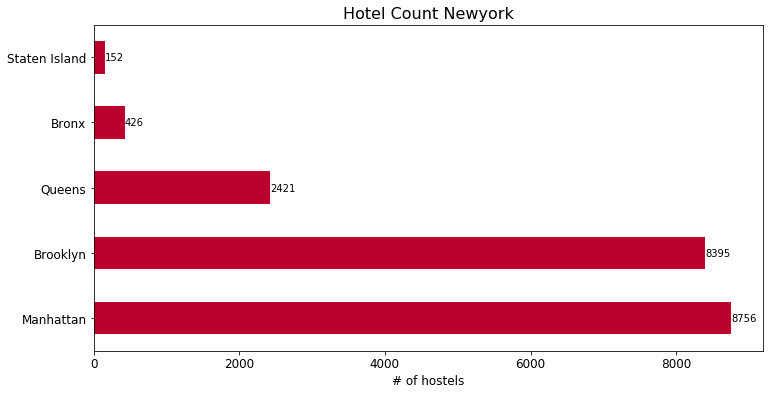

In [95]:

# Number of hotels in each group
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
ax = df_hotel_set.neighbourhood_group.value_counts().plot(kind="barh", color="#BC002D", fontsize=12)
ax.set_title("Hotel Count Newyork", fontsize=16)
ax.set_xlabel("# of hostels", fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() + 0.5, p.get_y() + 0.2))


### Most hotels in Manhattan
### Least hotels in Staten Island

In [96]:
nyc_map = folium.Map(location=(40.730610, -73.935242), zoom_start=11)

# add markers to map
for lat, lng, label in zip( df_hotel_set.latitude,  df_hotel_set.longitude, df_hotel_set.name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#BC002D',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(nyc_map)
    
nyc_map
nyc_map.save("visual1.png")


### Due to heavy size of the folium map ,I have not kept it in the notebook. I have provided a link for its html file 
<a href = "https://github.com/Rishikesh217/sample-repository/blob/master/visual1.html"> Click to see the map </a>

In [97]:
hostels_density = df_hotel_set.groupby('neighbourhood')['name'].count().to_frame().reset_index()
hostels_density.columns = ['Neighborhood', 'Count']
hostels_density.sort_values(['Count'], ascending=False)[:5]


,Neighborhood,Count
205,WILLIAMSBURG,1513
12,BEDFORD-STUYVESANT,1440
27,BUSHWICK,1072
91,HARLEM,1022
62,EAST VILLAGE,884


<p> It is evident that Willaimburg , Bedford-Stuyvesant host most number of hostels

In [98]:
sales = sales.sort_values(['SALEPRICE/FEET'])

In [99]:
sales.head()

,NEIGHBORHOOD,SALEPRICE/FEET
90,KIPS BAY,0.067098
65,FORT GREENE,2.564103
150,SPRINGFIELD GARDENS,8.620690
126,PORT IVORY,83.333333
82,INWOOD,88.513784


### Least costly places in NYC

<p> These are the cheapest places to buy real estate or buy a hotel

In [100]:
sales.tail()

,NEIGHBORHOOD,SALEPRICE/FEET
28,CHELSEA,2002.573502
161,UPPER EAST SIDE (59-79),2158.464456
73,GREENWICH VILLAGE-WEST,2361.232400
45,DOWNTOWN-METROTECH,2448.830409
67,GOWANUS,3359.144120


### These are costly places in NYC

<p> These are the costliest places to buy real-estate or buy a hotel

# Foursquare for analyzing NYC

In [101]:
 #define Foursquare Credentials and Version
CLIENT_ID = 'G3QIXXNMDCLCSIOP2035KSDSR0VI50XTSOPHMLO0SDNQVA0H' # your Foursquare ID
CLIENT_SECRET = 'SZBAHCYCUUS5KJY0QGQM5WFKTI2NIEYXPHXMK3I1ZE5AZXBC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: G3QIXXNMDCLCSIOP2035KSDSR0VI50XTSOPHMLO0SDNQVA0H
CLIENT_SECRET:SZBAHCYCUUS5KJY0QGQM5WFKTI2NIEYXPHXMK3I1ZE5AZXBC


In [105]:
def get_recommended_venues(name, lattitude, longitude, limit=100, radius=500):
    venues = []
    params = dict(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION,
        ll=f"{lattitude}, {longitude}",
        radius=radius,
        limit=limit,
        sortByPopularity=1
    )
    data = requests.get(explore_url, params=params).json()['response']['groups'][0]['items']
    for v in data:
        v = v['venue']
        primary_cat = ""
        for c in v['categories']:
            if(c['primary']):
                primary_cat=c['name']
        venues.append({
            'HostelName':name, 
            'VenueName': v['name'], 
            'Category': primary_cat, 
            'VenueLatitue': v['location']['lat'], 
            'VenueLongtitude': v['location']['lng']
        })
    return venues


In [106]:
venue_list = []
search_url = 'https://api.foursquare.com/v2/venues/search'
explore_url = 'https://api.foursquare.com/v2/venues/explore'

for name, lat, long in zip(df_hotel_set.name, df_hotel_set.latitude, df_hotel_set.longitude):
    venue_list.extend(get_recommended_venues(name, lat, long))
    i = len(venue_list)
    print(i)


53
142
220
285
385
446
504
576
650
683
783
802
862
928
1028
1111
1160
1260
1276
1367
1467
1525
1594
1683
1783
1883
1961
2043
2137
2155
2255
2355
2383
2483
2583
2683
2758
2854


KeyError: 'groups'

In [107]:
venues_df = pd.DataFrame(venue_list)
venues_df = venues_df.rename(columns={'VenueLatitue': 'VenueLatitude', 'VenueLongtitude': 'VenueLongitude'})
venues_df


,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
0,Clean & quiet apt home by the park,Park Circle,Plaza,40.651255,-73.973084
1,Clean & quiet apt home by the park,One Stop Market,Grocery Store,40.647491,-73.973726
2,Clean & quiet apt home by the park,7-Eleven,Convenience Store,40.644057,-73.969853
3,Clean & quiet apt home by the park,Der Pioneer,Bakery,40.645911,-73.972028
4,Clean & quiet apt home by the park,TD Bank,Bank,40.651697,-73.972867
5,Clean & quiet apt home by the park,KFC,Fried Chicken Joint,40.644216,-73.970550
6,Clean & quiet apt home by the park,Dunkin',Donut Shop,40.647652,-73.971552
7,Clean & quiet apt home by the park,Ideal Food Basket,Grocery Store,40.647950,-73.967461
8,Clean & quiet apt home by the park,Prospect Park Tennis Center,Tennis Court,40.651291,-73.970968
9,Clean & quiet apt home by the park,Thai Farm Kitchen,Thai Restaurant,40.644148,-73.976047


<p>Lets find the most Costly Neighbourhoods

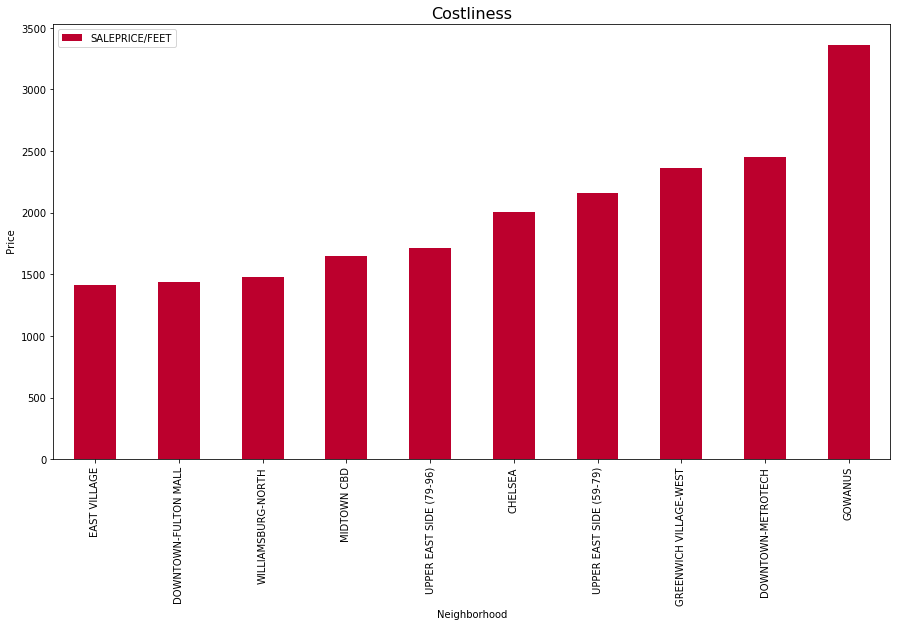

In [108]:
sales.tail(10).plot(x='NEIGHBORHOOD', y='SALEPRICE/FEET', kind='bar', figsize=(15, 8), color='#BC002D')
plt.xlabel("Neighborhood")
plt.ylabel(" Price")
plt.title("Costliness", fontsize=16)
plt.show()

### Gowanus and Downtown-Metrotech gardens are the most costly neighborhoods

<p>Lets find the least Costly Neighbourhoods

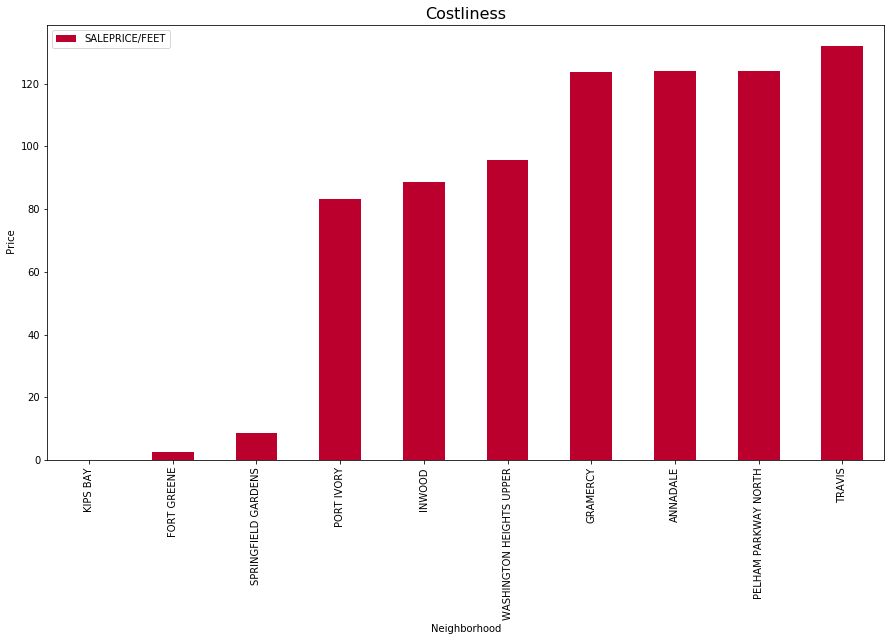

In [109]:
sales.head(10).plot(x='NEIGHBORHOOD', y='SALEPRICE/FEET', kind='bar', figsize=(15, 8), color='#BC002D')
plt.xlabel("Neighborhood")
plt.ylabel(" Price")
plt.title("Costliness", fontsize=16)
plt.show()

### Fort Greene and Springfield gardens are the least costly neighborhoods 

In [110]:
venues_df.Category.value_counts()


Coffee Shop                                 149
Bar                                          98
Pizza Place                                  96
Italian Restaurant                           81
Cocktail Bar                                 79
Café                                         60
Wine Shop                                    55
Bakery                                       55
Grocery Store                                54
Deli / Bodega                                52
American Restaurant                          51
Mexican Restaurant                           51
Gym / Fitness Center                         50
Sandwich Place                               47
Ice Cream Shop                               45
Japanese Restaurant                          44
Yoga Studio                                  41
Vietnamese Restaurant                        35
Bagel Shop                                   34
Juice Bar                                    34
Thai Restaurant                         

<p> Lets extract hotels close to coffee shops and bakeries

In [111]:
class1_hotels = venues_df[venues_df.Category.str.contains('Coffee')]
class1_hotels.head()

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
11,Clean & quiet apt home by the park,LARK,Coffee Shop,40.646811,-73.970043
17,Clean & quiet apt home by the park,Angelica's Coffee Shop,Coffee Shop,40.644265,-73.975743
28,Clean & quiet apt home by the park,Windsor Coffee,Coffee Shop,40.649026,-73.977466
56,Cozy Entire Floor of Brownstone,Starbucks,Coffee Shop,40.688818,-73.962678
71,Cozy Entire Floor of Brownstone,Playground Coffee Shop,Coffee Shop,40.686534,-73.954643


In [112]:
class1_hotels = df_hotel_set[df_hotel_set.name.isin(class1_hotels.HostelName)]
class1_hotels.shape

(37, 8)

In [113]:
c1m = class1_hotels.price.mean()

In [114]:
print('Average price of the hotels that are near to a Coffee shop char is',c1m, '$')

Average price of the hotels that are near to a Coffee shop char is 147.35135135135135 $


<p> Lets extract hotels near to Resteraunts

In [115]:
class2_hotels = venues_df[venues_df.Category.str.contains('Restaurant')]
class2_hotels.head()

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
9,Clean & quiet apt home by the park,Thai Farm Kitchen,Thai Restaurant,40.644148,-73.976047
12,Clean & quiet apt home by the park,Werkstatt,Austrian Restaurant,40.645252,-73.970341
15,Clean & quiet apt home by the park,Hamilton's,American Restaurant,40.648706,-73.977380
19,Clean & quiet apt home by the park,La Loba Cantina,Mexican Restaurant,40.645657,-73.972814
27,Clean & quiet apt home by the park,Hunger Pang,Asian Restaurant,40.646943,-73.969676


In [116]:
class2_hotels = df_hotel_set[df_hotel_set.name.isin(class2_hotels.HostelName)]
class2_hotels.shape

(38, 8)

In [117]:
c2m = class2_hotels.price.mean()
print('Average price of the hotels that are near to a Restaurant charge is',c2m, '$')

Average price of the hotels that are near to a Restaurant charge is 145.05263157894737 $


<p> Lets extract hotels near a bar

In [118]:
class3_hotels = venues_df[venues_df.Category.str.contains('Bar')]
class3_hotels.head()

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
10,Clean & quiet apt home by the park,Hinterlands Bar,Dive Bar,40.645985,-73.972050
23,Clean & quiet apt home by the park,Shenanigans Pub,Bar,40.647619,-73.972752
29,Clean & quiet apt home by the park,Red Mist,Hookah Bar,40.643455,-73.969935
68,Cozy Entire Floor of Brownstone,Doris,Bar,40.681416,-73.957345
70,Cozy Entire Floor of Brownstone,Do or Dive,Dive Bar,40.686869,-73.954709


In [119]:
class3_hotels = df_hotel_set[df_hotel_set.name.isin(class3_hotels.HostelName)]
class3_hotels.shape

(38, 8)

In [120]:
c3m = class3_hotels.price.mean()
print('Average price of the hotels that are near to a Bar charge is',c3m, '$')

Average price of the hotels that are near to a Bar charge is 145.05263157894737 $


<p> Lets extract hotels next to stores

In [121]:
class4_hotels = venues_df[venues_df.Category.str.contains('Store')]
class4_hotels.head()

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
1,Clean & quiet apt home by the park,One Stop Market,Grocery Store,40.647491,-73.973726
2,Clean & quiet apt home by the park,7-Eleven,Convenience Store,40.644057,-73.969853
7,Clean & quiet apt home by the park,Ideal Food Basket,Grocery Store,40.647950,-73.967461
41,Clean & quiet apt home by the park,Anaconda Vape,Vape Store,40.645833,-73.970915
55,Cozy Entire Floor of Brownstone,Associated Supermarket,Fruit & Vegetable Store,40.681473,-73.956760


In [122]:
class4_hotels = df_hotel_set[df_hotel_set.name.isin(class4_hotels.HostelName)]
class4_hotels.shape

(36, 8)

In [130]:
c4m = class4_hotels.price.mean()
print('Average price of the hotels that are near to a Bar charge is',c4m, '$')

Average price of the hotels that are near to a Bar charge is 146.88888888888889 $


<p> lets extract the ones close to museum

In [123]:
class5_hotels = venues_df[venues_df.Category.str.contains('Museum')]
class5_hotels.head()

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
260,Cute & Cozy Lower East Side 1 bdrm,Museum at Eldridge Street,Museum,40.714724,-73.993497
353,Chelsea Perfect,Rubin Museum of Art,Art Museum,40.740110,-73.997807
390,Hip Historic Brownstone Apartment with Backyard,Brooklyn Children's Museum,Museum,40.674814,-73.944253
906,LowerEastSide apt share shortterm 1,Museum at Eldridge Street,Museum,40.714724,-73.993497
1038,"1 Stop fr. Manhattan! Private Suite,Landmark B...",MoMA PS1 Contemporary Art Center,Art Museum,40.745515,-73.947276


In [124]:
class5_hotels = df_hotel_set[df_hotel_set.name.isin(class5_hotels.HostelName)]
class5_hotels.shape

(9, 8)

In [125]:
c5m = class5_hotels.price.mean()
print('Average price of the hotels that are near to a Museum charge is',c5m, '$')

Average price of the hotels that are near to a Museum charge is 202.22222222222223 $


In [126]:
class6_hotels = venues_df[venues_df.Category.str.contains('Historic Site')]
class6_hotels.head()

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
277,Cute & Cozy Lower East Side 1 bdrm,Chinatown Soup,Historic Site,40.715184,-73.991715
922,LowerEastSide apt share shortterm 1,Chinatown Soup,Historic Site,40.715184,-73.991715
2342,Entire 2 Bedroom - Large & Sunny,Chinatown Soup,Historic Site,40.715184,-73.991715


In [127]:
class6_hotels = df_hotel_set[df_hotel_set.name.isin(class6_hotels.HostelName)]
class6_hotels.shape

(3, 8)

In [128]:
c6m = class6_hotels.price.mean()
print('Average price of the hotels that are near to a Museum charge is',c6m, '$')

Average price of the hotels that are near to a Museum charge is 158.33333333333334 $


In [131]:
mean_costs = [c1m,c2m,c3m,c4m,c5m,c6m]
Amenities = ['Coffee Shop','Restaurant','Bar','Convenient stores','Museum','Historic sites']
cost_var = pd.DataFrame()
cost_var['mean_cost'] = mean_costs
cost_var['Amenities'] = Amenities


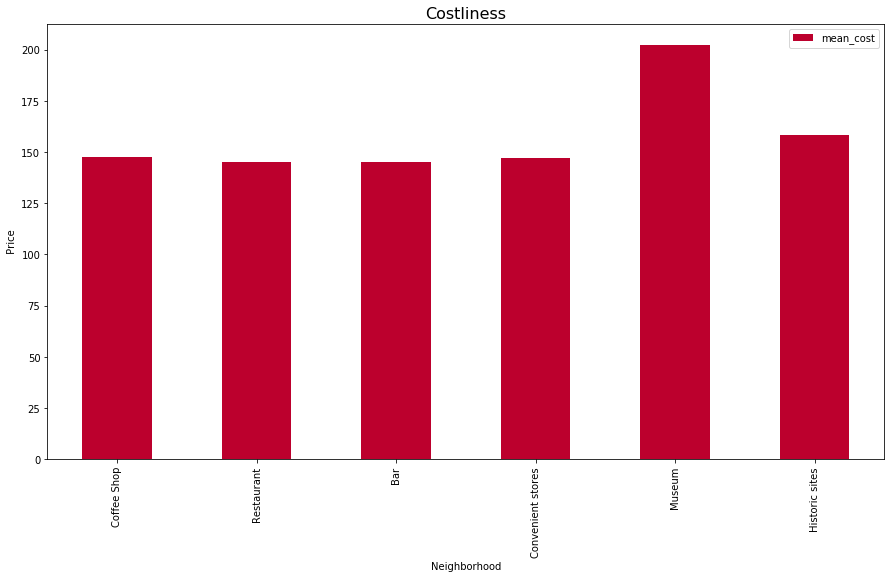

In [132]:
cost_var.plot(x='Amenities', y='mean_cost', kind='bar', figsize=(15, 8), color='#BC002D')
plt.xlabel("Neighborhood")
plt.ylabel(" Price")
plt.title("Costliness", fontsize=16)
plt.show()

<p> Hotels next to museums and historic sites are on average more costly than other amenities.
    

# Clustering

<p> Here we will perform 2 types of clustering
<p> 1. Based on charge per night and cost per square feet
    <p> Price and cost per square feet are the prime indicators of the location having a posh locality , better infrastructure with all luxurious institutions . An Investor will surely be interested in such places.
<p> 2. Based on Neighborhoods

## clustering based on price

In [133]:
X = df_hotel_set[['price','Cost/feet']]


In [134]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_


In [135]:
scores = [get_inertia(x) for x in range(2, 21)]


Text(0, 0.5, 'Error')

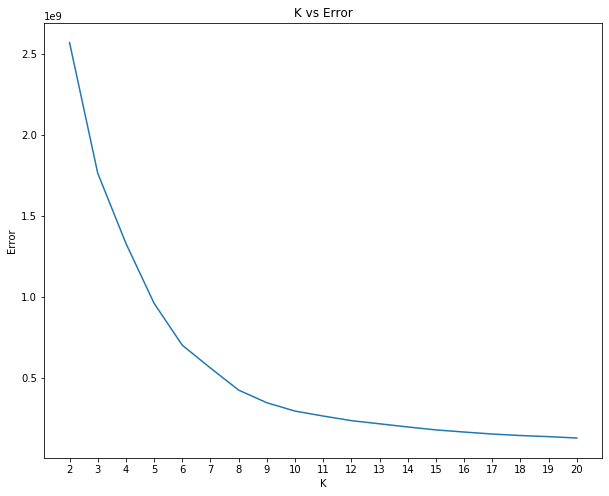

In [136]:
import seaborn as sns
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores)
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")


<p> It is evident that this 8 will be the appropriate number of clusters

In [137]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [138]:
df_hotel_set['RatingCluster'] = kmeans.labels_

In [139]:
Nyc_map1 = folium.Map(location=(40.730610, -73.935242), zoom_start=11)

# set color scheme for the clusters
x = np.arange(9)
ys = [i + x + (i*x)**2 for i in range(9)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
markers_colors = []
for lat, lng, name, cluster in zip(df_hotel_set.latitude, df_hotel_set.longitude, df_hotel_set.name, kmeans.labels_):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(Nyc_map1)
    
Nyc_map1
Nyc_map1.save("visual2.html")

### Due to heavy size of the folium map ,I have not kept it in the notebook. I have provided a link for its html file 
<a href = "https://github.com/Rishikesh217/sample-repository/blob/master/visual2.html"> Click to see the map </a>

# Exploring Clusters
## Finding the cluster with highest and the lowest cost per square feet.

In [140]:
df_hotel_set[df_hotel_set.RatingCluster == 0].describe()


,id,latitude,longitude,price,Cost/feet,RatingCluster
count,5.978000e+03,5978.000000,5978.000000,5978.000000,5978.000000,5978.0
mean,1.839460e+07,40.727362,-73.952151,133.580964,673.711541,0.0
std,1.080974e+07,0.054048,0.044791,93.526416,74.783570,0.0
min,5.099000e+03,40.556160,-74.163700,10.000000,559.389142,0.0
25%,9.109916e+06,40.688835,-73.983015,68.000000,622.257136,0.0
50%,1.913757e+07,40.722605,-73.955345,105.000000,643.947751,0.0
75%,2.817549e+07,40.761898,-73.936970,175.000000,763.648252,0.0
max,3.648724e+07,40.904060,-73.722470,600.000000,804.376386,0.0


## Cluster 1 
<p> has the highest cost per square feet value and hence it is a posh area . An investor has to be careful while buying a hotel or building one in such an area where there will be a lot of competition.

In [141]:
df_hotel_set[df_hotel_set.RatingCluster == 1].describe()


,id,latitude,longitude,price,Cost/feet,RatingCluster
count,1.979000e+03,1979.000000,1979.000000,1979.000000,1979.000000,1979.0
mean,1.674073e+07,40.726042,-73.954591,135.763517,1007.300856,1.0
std,1.098758e+07,0.053565,0.041627,96.252037,71.598338,0.0
min,8.024000e+03,40.508730,-74.239140,20.000000,854.723290,1.0
25%,6.883121e+06,40.687780,-73.983160,70.000000,959.411578,1.0
50%,1.633669e+07,40.719250,-73.958820,110.000000,1003.230052,1.0
75%,2.556436e+07,40.759675,-73.939295,170.000000,1108.872429,1.0
max,3.644512e+07,40.897010,-73.725970,692.000000,1108.872429,1.0


## Cluster 2
<p> it has th lowest cost per square feet .An investor can think of buying more land for lesser cost and develope some project.

In [142]:
df_hotel_set[df_hotel_set.RatingCluster == 7].describe()


,id,latitude,longitude,price,Cost/feet,RatingCluster
count,2.330000e+02,233.000000,233.000000,233.000000,233.000000,233.0
mean,2.057893e+07,40.733356,-73.974435,1098.012876,657.916909,7.0
std,1.150264e+07,0.042277,0.031392,483.224286,319.987361,0.0
min,1.960100e+04,40.576450,-74.028840,649.000000,220.980943,7.0
25%,1.124065e+07,40.716530,-73.994630,750.000000,457.076039,7.0
50%,2.170973e+07,40.738970,-73.979160,913.000000,559.389142,7.0
75%,3.147544e+07,40.759200,-73.963180,1299.000000,796.362690,7.0
max,3.638872e+07,40.886710,-73.788510,2626.000000,2002.573502,7.0


In [143]:
df_hotel_set[df_hotel_set.RatingCluster == 3].describe()


,id,latitude,longitude,price,Cost/feet,RatingCluster
count,2.470000e+02,247.000000,247.000000,247.000000,2.470000e+02,247.0
mean,1.724528e+07,40.724368,-73.953242,158.125506,3.359144e+03,3.0
std,1.042564e+07,0.053727,0.051301,205.356235,1.913817e-11,0.0
min,2.601200e+04,40.562510,-74.147810,32.000000,3.359144e+03,3.0
25%,8.021616e+06,40.684340,-73.985775,65.000000,3.359144e+03,3.0
50%,1.867410e+07,40.719120,-73.959510,101.000000,3.359144e+03,3.0
75%,2.530749e+07,40.763360,-73.938625,192.500000,3.359144e+03,3.0
max,3.627911e+07,40.869250,-73.721790,2750.000000,3.359144e+03,3.0


## Cluster 4 charges the highest

In [144]:
df_hotel_set[df_hotel_set.RatingCluster == 4].describe()


,id,latitude,longitude,price,Cost/feet,RatingCluster
count,1.836000e+03,1836.000000,1836.000000,1836.000000,1.836000e+03,1836.0
mean,1.669754e+07,40.729394,-73.956235,141.090959,1.413160e+03,4.0
std,1.112184e+07,0.052185,0.043704,105.372943,4.344020e-11,0.0
min,9.657000e+03,40.538840,-74.198260,20.000000,1.413160e+03,4.0
25%,7.317474e+06,40.691750,-73.984328,70.750000,1.413160e+03,4.0
50%,1.586350e+07,40.725210,-73.959990,110.000000,1.413160e+03,4.0
75%,2.615106e+07,40.763528,-73.941290,179.000000,1.413160e+03,4.0
max,3.647834e+07,40.912340,-73.725810,800.000000,1.413160e+03,4.0


In [145]:
df_hotel_set[df_hotel_set.RatingCluster == 5].describe()


,id,latitude,longitude,price,Cost/feet,RatingCluster
count,8.747000e+03,8747.000000,8747.000000,8747.000000,8747.000000,8747.0
mean,2.060346e+07,40.726640,-73.949732,131.923517,418.472456,5.0
std,1.067052e+07,0.055369,0.049043,94.873994,83.306213,0.0
min,2.539000e+03,40.506410,-74.230590,10.000000,207.039337,5.0
25%,1.216749e+07,40.688685,-73.981725,65.000000,353.879168,5.0
50%,2.162443e+07,40.720100,-73.954410,100.000000,447.479397,5.0
75%,2.997583e+07,40.762070,-73.930755,170.000000,481.408645,5.0
max,3.648561e+07,40.911690,-73.712990,650.000000,527.822080,5.0


In [146]:
df_hotel_set[df_hotel_set.RatingCluster == 6].describe()


,id,latitude,longitude,price,Cost/feet,RatingCluster
count,2.000000e+01,20.000000,20.000000,20.00000,20.000000,20.0
mean,2.268076e+07,40.729999,-73.990551,4550.20000,580.250780,6.0
std,1.311609e+07,0.050520,0.033708,1338.88943,385.639077,0.0
min,8.266900e+05,40.630870,-74.097300,2850.00000,269.499928,6.0
25%,1.427712e+07,40.694608,-74.004113,3587.75000,401.252790,6.0
50%,2.722493e+07,40.728865,-73.993530,4180.00000,450.260999,6.0
75%,3.306505e+07,40.766615,-73.968990,5062.50000,663.135127,6.0
max,3.605681e+07,40.813150,-73.951100,7500.00000,2002.573502,6.0


## Clustering based on neighborhoods

In [147]:
category_1hot = pd.get_dummies(venues_df.Category)
category_1hot['HotelName'] = venues_df.HostelName
# move neighborhood column to the first column
fixed_columns = [category_1hot.columns[-1]] + list(category_1hot.columns[:-1])
category_1hot = category_1hot[fixed_columns]
category_1hot.head()


,HotelName,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Ukrainian Restaurant,Used Bookstore,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar

In [148]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.
category_1hot = category_1hot.groupby('HotelName').mean().reset_index()
category_1hot.head()


,HotelName,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Ukrainian Restaurant,Used Bookstore,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar

In [149]:
num_top_venues = 5


for nbrhood in category_1hot.HotelName[:5]:
    print("---- "+nbrhood+" ----")
    temp = category_1hot[category_1hot.HotelName == nbrhood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- **Bright Nolita Apt w Doorman/Elevators/Gym** ----
                      venue  freq
0        Italian Restaurant  0.05
1  Mediterranean Restaurant  0.04
2                     Hotel  0.03
3            Pilates Studio  0.03
4               Coffee Shop  0.03


---- 1 Stop fr. Manhattan! Private Suite,Landmark Block ----
                  venue  freq
0                  Café  0.06
1           Coffee Shop  0.05
2    Italian Restaurant  0.05
3                 Hotel  0.04
4  Gym / Fitness Center  0.04


---- BLUE TRIM GUEST HOUSE ----
          venue  freq
0           Bar  0.09
1   Pizza Place  0.07
2  Cocktail Bar  0.06
3     Wine Shop  0.05
4        Bakery  0.04


---- Beautiful Meatpacking District Loft ----
                 venue  freq
0          Coffee Shop  0.11
1   Seafood Restaurant  0.04
2  American Restaurant  0.04
3       Ice Cream Shop  0.03
4                 Park  0.03


---- CBG CtyBGd HelpsHaiti rm#1:1-4 ----
            venue  freq
0     Coffee Shop  0.10
1   Deli / Bodega 

In [150]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [151]:
indicators = ['st', 'nd', 'rd']
num_top_venues = 10

# create columns according to number of top venues
columns = ['HotelName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nbr_venues_sorted_df = pd.DataFrame(columns=columns)
nbr_venues_sorted_df['HotelName'] = category_1hot.HotelName

for ind in np.arange(category_1hot.shape[0]):
    nbr_venues_sorted_df.iloc[ind, 1:] = return_most_common_venues(category_1hot.iloc[ind, :], num_top_venues)

nbr_venues_sorted_df.head()


,HotelName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,**Bright Nolita Apt w Doorman/Elevators/Gym**,Italian Restaurant,Mediterranean Restaurant,Hotel,Pilates Studio,Coffee Shop,Clothing Store,Cosmetics Shop,Pizza Place,Wine Shop,Women's Store
1,"1 Stop fr. Manhattan! Private Suite,Landmark B...",Café,Italian Restaurant,Coffee Shop,Hotel,Art Gallery,Donut Shop,Gym / Fitness Center,Pizza Place,Gym,Supermarket
2,BLUE TRIM GUEST HOUSE,Bar,Pizza Place,Cocktail Bar,Wine Shop,Café,Bakery,Italian Restaurant,Coffee Shop,Lounge,Playground
3,Beautiful Meatpacking District Loft,Coffee Shop,American Restaurant,Seafood Restaurant,Gym,Park,Ice Cream Shop,Steakhouse,Bakery,Beer Bar,Cupcake Shop
4,CBG CtyBGd HelpsHaiti rm#1:1-4,Coffee Shop,Deli / Bodega,Bakery,Sandwich Place,Pizza Place,Vietnamese Restaurant,Japanese Restaurant,Gym / Fitness Center,Cosmetics Shop,Dance Studio


In [152]:
#CLUSTERING IN 4 TYPE OF NEIGHBORHOOD
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=15, random_state=8)
X = category_1hot.drop(['HotelName'], axis=1)
X.head()


,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Ukrainian Restaurant,Used Bookstore,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,

In [153]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=15,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=8, tol=0.0001, verbose=0)

In [154]:
nbr_venues_sorted_df['Cluster'] = kmeans.labels_
nbr_venues_sorted_df.rename(columns={'HotelName': 'name'}, inplace=True)

In [155]:
hotels_df_merged = pd.merge(df_hotel_set, nbr_venues_sorted_df, on='name')
hotels_df_merged.head()


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,price,Cost/feet,RatingCluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
0,2539,Clean & quiet apt home by the park,Brooklyn,KENSINGTON,40.64749,-73.97237,149,425.695176,5,Coffee Shop,Park,Grocery Store,Bakery,Pizza Place,Thai Restaurant,Indian Restaurant,Mexican Restaurant,Yoga Studio,Café,1
1,3831,Cozy Entire Floor of Brownstone,Brooklyn,CLINTON HILL,40.68514,-73.95976,89,498.626772,5,Bar,Wine Shop,Pizza Place,Coffee Shop,Grocery Store,Deli / Bodega,Café,Cocktail Bar,Mexican Restaurant,Caribbean Restaurant,0
2,5099,Large Cozy 1 BR Apartment In Midtown East,Manhattan,MURRAY HILL,40.74767,-73.97500,200,612.365211,0,Coffee Shop,Park,Sushi Restaurant,American Restaurant,Bar,Café,Deli / Bodega,Hotel,Pizza Place,Jewish Restaurant,1
3,5238,Cute & Cozy Lower East Side 1 bdrm,Manhattan,CHINATOWN,40.71344,-73.99037,150,783.792050,0,Vegetarian / Vegan Restaurant,American Restaurant,Cocktail Bar,Chinese Restaurant,Greek Restaurant,Sandwich Place,Spanish Restaurant,Ice Cream Shop,Coffee Shop,Bar,1
4,7322,Chelsea Perfect,Manhattan,CHELSEA,40.74192,-73.99501,140,2002.573502,2,Coffee Shop,Gym / Fitness Center,Grocery Store,Yoga Studio,Miscellaneous Shop,Cycle Studio,Women's Store,Ice Cream Shop,Sushi Restaurant,Bakery,1


### Visualize the clusters

In [156]:
# create map
Nyc_map2 = folium.Map(location=(40.730610, -73.935242), zoom_start=11)
# set color scheme for the clusters
x = np.arange(9)
ys = [i + x + (i*x)**2 for i in range(9)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hotels_df_merged['latitude'], hotels_df_merged['longitude'],hotels_df_merged['name'], hotels_df_merged['Cluster']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster) + ')', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.7).add_to(Nyc_map2)
    
Nyc_map2
Nyc_map2.save("visual3.html")

### Due to heavy size of the folium map ,I have not kept it in the notebook. I have provided a link for its html file 
<a href = "https://github.com/Rishikesh217/sample-repository/blob/master/visual3.html"> Click to see the map </a>

## Exploring clusters

#### Cluster 0

In [157]:
hotels_df_merged.loc[hotels_df_merged['Cluster'] == 0, hotels_df_merged.columns[[0] + list(range(18, hotels_df_merged.shape[1]))]][:5]


,id,10th Most Common Venue,Cluster
1,3831,Caribbean Restaurant,0
12,11708,Smoke Shop,0
14,12192,Eastern European Restaurant,0
21,16326,Diner,0
22,16338,Grocery Store,0


In [158]:
hotels_df_merged.loc[hotels_df_merged['Cluster'] == 0]['1st Most Common Venue'].value_counts()


Bar                   4
Italian Restaurant    3
Cocktail Bar          1
Coffee Shop           1
Pizza Place           1
Mexican Restaurant    1
Name: 1st Most Common Venue, dtype: int64

## Cluster 1 properties : Bars

In [159]:
hotels_df_merged.loc[hotels_df_merged['Cluster'] == 1, hotels_df_merged.columns[[0] + list(range(18, hotels_df_merged.shape[1]))]][:5]


,id,10th Most Common Venue,Cluster
0,2539,Café,1
2,5099,Jewish Restaurant,1
3,5238,Bar,1
4,7322,Bakery,1
5,7726,Japanese Restaurant,1


In [160]:
hotels_df_merged.loc[hotels_df_merged['Cluster'] == 1]['1st Most Common Venue'].value_counts()


Coffee Shop                      9
Café                             2
Sandwich Place                   2
Park                             2
Vegetarian / Vegan Restaurant    2
Mexican Restaurant               1
Caribbean Restaurant             1
American Restaurant              1
Italian Restaurant               1
Spanish Restaurant               1
Pizza Place                      1
Japanese Restaurant              1
Name: 1st Most Common Venue, dtype: int64

## Cluster 2 properties : Coffee shops

In [161]:
hotels_df_merged.loc[hotels_df_merged['Cluster'] == 2, hotels_df_merged.columns[[0] + list(range(18, hotels_df_merged.shape[1]))]][:5]


,id,10th Most Common Venue,Cluster
11,9782,Bar,2
18,15338,Discount Store,2


In [162]:
hotels_df_merged.loc[hotels_df_merged['Cluster'] == 2]['1st Most Common Venue'].value_counts()


Pizza Place    1
Pie Shop       1
Name: 1st Most Common Venue, dtype: int64

## Cluster 3 properties: Pizza place (Fast food)

In [163]:
hotels_df_merged.loc[hotels_df_merged['Cluster'] == 3, hotels_df_merged.columns[[0] + list(range(18, hotels_df_merged.shape[1]))]][:5]


,id,10th Most Common Venue,Cluster
29,18198,Resort,3


In [164]:
hotels_df_merged.loc[hotels_df_merged['Cluster'] == 3]['1st Most Common Venue'].value_counts()


Thai Restaurant    1
Name: 1st Most Common Venue, dtype: int64

## Cluster 4 properties : Exotic Restaurants

# Conclusion

<p>Here we found out the hotel distribution and price distribution of the hotels in New-York and were able to find out some interesting insights which might be useful to travellers as well as people with business interests. Let's summarize our findings:</p>

There are many things which I have assumed while making the above claims since we were working with limited. I'll try to expand the dataset for a more comprehensive study.
Most hostels are located in WilliamsBurg.
Williamsburg seems to be an interesting locality since it is close to Manhattan and 4th cheapest neighborhood.
The starting price of hostels does not vary much depending on its distance from the city centre.
Most of the hotels in Gowanus are costly.
    
Proximity to a Museum or a historic site positively affects the hostel rating.
Hostels rated highly for being value for money are comparatively cheaper and are located away from the city centre
